In [139]:
from age_model import TfProbabilityResnet50Classifier, TfProbabilityCnnRegressor, TfProbabilityCnnClassifier
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import seaborn as sns

In [194]:
model = TfProbabilityResnet50Classifier(input_dim=(128, 128, 3), n_classes=100)
model.summary()

/Users/gtregoat/opt/anaconda3/envs/age_prediction_tf_proba/lib/python3.8/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  loc = add_variable_fn(
/Users/gtregoat/opt/anaconda3/envs/age_prediction_tf_proba/lib/python3.8/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  untransformed_scale = add_variable_fn(


Model: "tf_probability_resnet50_regressor_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_8  (None, 128, 128, 16)     896       
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_reparameterization_9  (None, 64, 64, 32)       9280      
  (Conv2DReparameterization)                                     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_reparameterization_1  (

In [258]:
# Train - Data Preparation - Data Augmentation with generators
train_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.4, 1.5],
    rescale=1. / 255,
)


training_dataset = train_datagen.flow_from_directory(
    "data/train/",
    color_mode="rgb",
    batch_size=32,
    target_size=(128, 128),
    shuffle=True,
    seed=42,
    interpolation="bilinear",
    follow_links=False,
)

Found 185632 images belonging to 100 classes.


In [259]:
# Train - Data Preparation - Data Augmentation with generators
test_datagen = ImageDataGenerator(
    rescale=1. / 255,
)

test_dataset = test_datagen.flow_from_directory(
    "data/train/",
    color_mode="rgb",
    batch_size=32,
    target_size=(128, 128),
    shuffle=True,
    seed=42,
    interpolation="bilinear",
    follow_links=False,
)

Found 185632 images belonging to 100 classes.


In [260]:
def regression_flow_from_directory(flow_from_directory_gen):
    for x, y in flow_from_directory_gen:
        yield x, np.argmax(y, axis=1).astype(float)

In [262]:
model.fit(regression_flow_from_directory(training_dataset), epochs=5,
          validation_data=regression_flow_from_directory(test_dataset), steps_per_epoch=1000,
          validation_steps=200,
          )

Epoch 1/5
1000/1000 [==============================] - 328s 328ms/step - loss: 8.1592 - mean_squared_error: 311.2455 - val_loss: 8.0306 - val_mean_squared_error: 302.6938
Epoch 2/5
1000/1000 [==============================] - 365s 365ms/step - loss: 8.0183 - mean_squared_error: 311.5989 - val_loss: 7.8966 - val_mean_squared_error: 304.8921
Epoch 3/5
1000/1000 [==============================] - 359s 359ms/step - loss: 7.8498 - mean_squared_error: 310.0159 - val_loss: 7.7635 - val_mean_squared_error: 313.8779
Epoch 4/5
1000/1000 [==============================] - 360s 360ms/step - loss: 7.6555 - mean_squared_error: 311.8650 - val_loss: 7.5489 - val_mean_squared_error: 310.8736
Epoch 5/5
1000/1000 [==============================] - 374s 374ms/step - loss: 7.4209 - mean_squared_error: 308.4943 - val_loss: 7.2771 - val_mean_squared_error: 304.5044


In [263]:
model.history.history

{'loss': [8.159211158752441,
  8.018266677856445,
  7.849758148193359,
  7.655517578125,
  7.420851230621338],
 'mean_squared_error': [311.24554443359375,
  311.5989074707031,
  310.01593017578125,
  311.8649597167969,
  308.4942626953125],
 'val_loss': [8.030569076538086,
  7.896627902984619,
  7.763532638549805,
  7.548930644989014,
  7.277132034301758],
 'val_mean_squared_error': [302.6937561035156,
  304.8921203613281,
  313.8779296875,
  310.87359619140625,
  304.5044250488281]}

In [ ]:
example_images = []
example_labels = []

for x, y in test_dataset:
    example_images.append(x)
    example_labels.append(np.argmax(y, axis=1))

example_images = np.concatenate(example_images, axis=0)
example_labels = np.concatenate(example_labels, axis=0)

In [ ]:
def analyse_model_prediction(image, label, forward_passes=1000):
    predicted_distribution = model(tf.expand_dims(image, axis=0))
    sns.distplot(predicted_distribution.sample(forward_passes))
    plt.title("Samples from a standard Normal")
    plt.axvline(x=label)
    plt.show()
    plt.imshow(example_images[n] / 255)
    plt.show()
    print(label)

In [ ]:
n = np.random.randint(0, 300)
analyse_model_prediction(example_images[n], example_labels[n])

In [219]:
clf = TfProbabilityResnet50Classifier(input_dim=(128, 128, 3), n_classes=100)

/Users/gtregoat/opt/anaconda3/envs/age_prediction_tf_proba/lib/python3.8/site-packages/tensorflow_probability/python/layers/util.py:95: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  loc = add_variable_fn(
/Users/gtregoat/opt/anaconda3/envs/age_prediction_tf_proba/lib/python3.8/site-packages/tensorflow_probability/python/layers/util.py:105: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  untransformed_scale = add_variable_fn(


In [220]:
clf.fit(training_dataset, epochs=1,
          validation_data=test_dataset, steps_per_epoch=200,
          validation_steps=100,
          )

200/200 [==============================] - 68s 326ms/step - loss: 103.1671 - accuracy: 0.0227 - val_loss: 21.8654 - val_accuracy: 0.0231


In [221]:
def analyse_model_prediction_clf(image, label = None, forward_passes = 10):
    # if label is not None:
    #     label = np.argmax(label, axis = -1)

    extracted_probabilities = np.empty(shape=(forward_passes, 100))
    extracted_std = np.empty(shape=(forward_passes, 100))
    for i in range(forward_passes):
        model_output_distribution = clf(tf.expand_dims(image,
                                                  axis = 0))
        extracted_probabilities[i] = model_output_distribution.mean().numpy().flatten()
        extracted_std[i] = model_output_distribution.stddev().numpy().flatten()

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6),
                                   gridspec_kw={'width_ratios': [2, 4]})
    plt.xticks(fontsize = 16, rotation = 45)
    plt.yticks(fontsize = 16)

    # Show the image and the true label if provided.
    ax1.imshow(image/255)
    ax1.axis('off')
    if label is not None:
        ax1.set_title('True Label: {}'.format(str(label)), fontsize = 20)
    else:
        ax1.set_title('True Label Not Given', fontsize = 20)

    # Obtain the 95% prediction interval.
    # extracted_probabilities.shape = (forward_passes, 10)
    # So if we sample from the model 100 times, there will be 100 different
    # values for each of the 10 classes.
    # We get the interval for each of the classes independently.
    pct_2p5 = np.array([np.percentile(extracted_probabilities[:, i],
                                      2.5) for i in range(100)])
    pct_97p5 = np.array([np.percentile(extracted_probabilities[:, i],
                                       97.5) for i in range(100)])

    # Std also contains 100 different values. We take median across the column
    # to obtain a single value for each of the class label.
    extracted_std = np.median(extracted_std, axis = 0)
    highest_var_label = np.argmax(extracted_std, axis = -1)
    if label is not None:
        print('Label %d has the highest std in this'
        ' prediction with the value %.3f' %(highest_var_label,
                                            extracted_std[highest_var_label]))
    else:
      print('Std Array:', extracted_std)

    bar = ax2.bar(np.arange(100), pct_97p5, color='red')
    if label is not None:
        bar[int(label)].set_color('green')

    ax2.bar(np.arange(100), pct_2p5-0.02, color='white',
            linewidth=4, edgecolor='white')
    ax2.set_xticks(np.arange(0, 100, 10))

    ax2.set_ylim([0, 1])
    ax2.set_ylabel('Probability', fontsize = 18)
    ax2.set_title("Model's Probabilities", fontsize = 20)
    plt.show()

Label 33 has the highest std in this prediction with the value 0.007


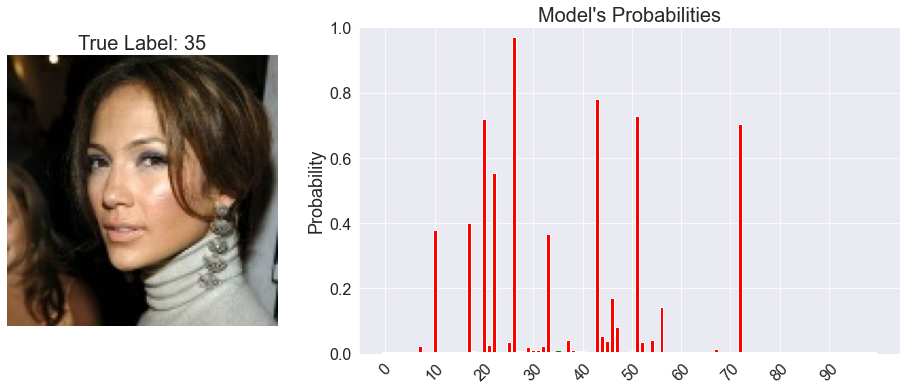

In [225]:
n = np.random.randint(0, 300)
analyse_model_prediction_clf(example_images[n], example_labels[n], 10)